In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

from tensorflow.keras.layers import LSTM

import matplotlib.pyplot as plt

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 80s 492ms/step - loss: 0.6007 - acc: 0.6600 - val_loss: 0.4262 - val_acc: 0.8236
Epoch 2/10
157/157 [==============================] - 78s 495ms/step - loss: 0.3709 - acc: 0.8447 - val_loss: 0.4873 - val_acc: 0.7708
Epoch 3/10
157/157 [==============================] - 80s 510ms/step - loss: 0.2843 - acc: 0.8856 - val_loss: 0.4371 - val_acc: 0.8054
Epoch 4/10
157/157 [==============================] - 76s 483ms/step - loss: 0.2258 - acc: 0.9136 - val_loss: 0.4198 - val_acc: 0.8084
Epoch 5/10
157/157 [==============================] - 75s 479ms/step - loss: 0.1794 - acc: 0.9340 - val_loss: 0.4361 - val_acc: 0.7918
Epoch 6/10
157/157 [==============================] - 76s 485ms/step - loss: 0.1388 - acc: 0.9508 - val_loss: 0.3921 - val_acc: 0.8666
Epoch 7/10
157/157 [==============================] - 84s 538ms/step - loss: 0.1061 - acc: 0.9650 - val_loss: 0.4701 - val_acc: 0.8112
Epoch 8/10
157/157 [==============================] - 8

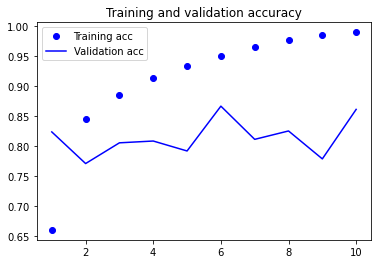

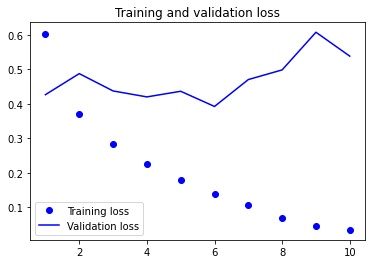

In [4]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 20ms/step - loss: 0.4891 - acc: 0.7622 - val_loss: 0.3298 - val_acc: 0.8686
Epoch 2/10
157/157 [==============================] - 3s 18ms/step - loss: 0.2838 - acc: 0.8878 - val_loss: 0.3226 - val_acc: 0.8662
Epoch 3/10
157/157 [==============================] - 3s 18ms/step - loss: 0.2328 - acc: 0.9097 - val_loss: 0.2939 - val_acc: 0.8754
Epoch 4/10
157/157 [==============================] - 3s 18ms/step - loss: 0.1983 - acc: 0.9263 - val_loss: 0.3051 - val_acc: 0.8766
Epoch 5/10
157/157 [==============================] - 3s 18ms/step - loss: 0.1763 - acc: 0.9354 - val_loss: 0.3159 - val_acc: 0.8588
Epoch 6/10
157/157 [==============================] - 3s 18ms/step - loss: 0.1545 - acc: 0.9442 - val_loss: 0.3592 - val_acc: 0.8654
Epoch 7/10
157/157 [==============================] - 3s 18ms/step - loss: 0.1363 - acc: 0.9527 - val_loss: 0.6709 - val_acc: 0.8236
Epoch 8/10
157/157 [==============================] - 3s 17ms/step - 

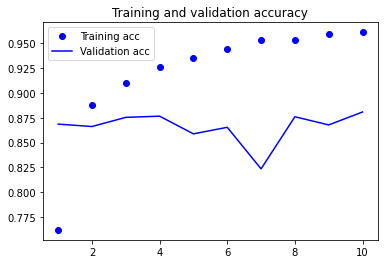

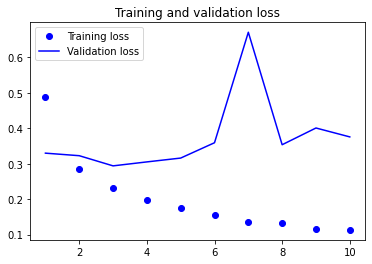

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()